# Classes and Objects
Our week 3 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [7]:
import math
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`!
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [8]:
# demo code
def foo():
    pass

class Foo:
    pass

f = Foo()
f
type(Foo), type(f)
type(zip), type(zip())
type(int), type(42)
type(Foo), type(Foo())
type(type)
bool([])

False

## Stack

A type of collection where data is inserted and removed from the same "end" of the collection. Operations are:
* push(item) -> None
* pop() -> item
* top() -> item

In [9]:
class Stack:
    """ A stack type that implements classic stack operations. """

    def __init__(self):
        self._items = []

    def __lt__(self, other):
        """ return True iff this stack is shorter than the other stack """
        return len(self._items) < len(other._items)

    def push(self, item):
        """ push the item onto the top of the stack (mutator)"""
        self._items.append(item)

    def pop(self):
        """ remove the item from top of stack and return it """
        return self._items.pop()

    def top(self):
        """ examine the top of the stack and return the item without removing it """
        return self._items[-1]

    def is_empty(self):
        """ return True iff there are no elements in the stack """
        return len(self._items) == 0


def test_stack():
    s = Stack()
    s.is_empty()
    Stack.is_empty(s)
    #two lines above are equivalent
    s.push(42)
    s.push(99)
    s.push(101)
    assert s.top() == 101
    assert s.pop() == 101
    assert s.top() == 99
    assert not s.is_empty()
    t = Stack()
    assert t.is_empty()
    assert t < s and not s < t
    print("tests pass")

# Stack.__lt__(t, s), t < s
# int.__lt__(42, 99), 42 < 99
# type(int), type(Stack)

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [24]:
class Circle:
    """ Representation for the data and operations on a circle """
    def __init__(self, radius:float, centre:tuple):
        assert len(centre) == 2
        self.radius = radius
        self.centre = centre

    def area(self):
        """ Return the area of this circle """
        return math.pi * self.radius**2

    def move(self, offset:tuple):
        """ Move this circle by given (x,y) offset """
        new_pos = (self.centre[0] + offset[0], self.centre[1] + offset[1])
        self.centre = new_pos

    def distance(self, other:Circle):
        """ Return the distance between this circle's centre and the other one """
        return math.sqrt(
            (self.centre[0] - other.centre[0])**2 +
            (self.centre[1] - other.centre[1])**2
            )

    def intersects(self, other:Circle):
        """ Return True iff this circle intersects the other one """
        return self.distance(other) < self.radius + other.radius


In [33]:
# Test Circle class
def test_circle():
    c1 = Circle(3, (2, 4))
    c2 = Circle(2, (5, 8))
    assert c1 != c2 and c1.radius != c2.radius and c1.centre != c2.centre
    assert c1.area() == 9 * math.pi
    assert c1.centre == (2, 4)
    assert c1.distance(c2) == c2.distance(c1)
    assert c1.distance(c2) == 5.0
    assert c1.intersects(c2) == False
    c1.move((1,1))
    assert c1.intersects(c2) == True
    print("Tests passed!")

test_circle()

Tests passed!


## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


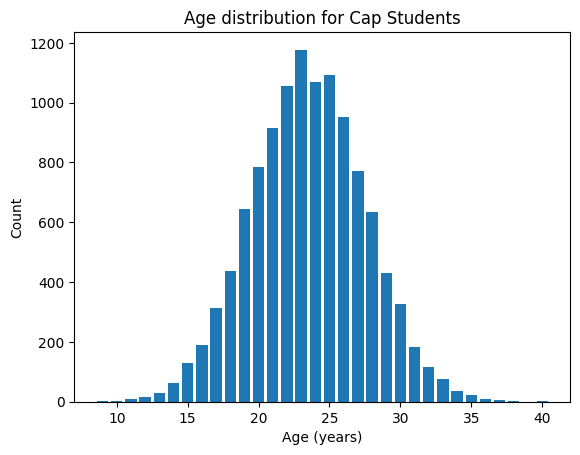

In [12]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [13]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

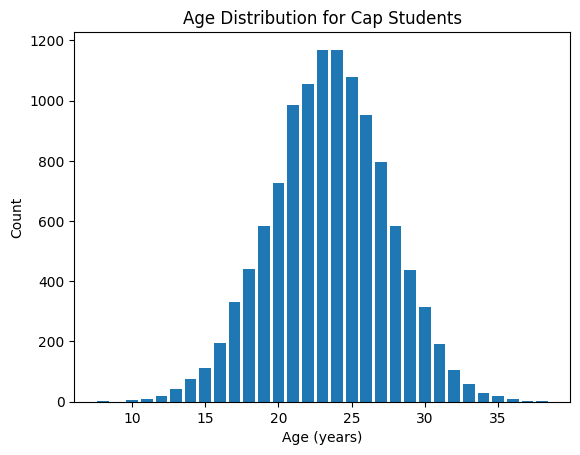

In [14]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()